# Analysis
trying to predict if the text is from a DSS or SI injury using the text inside

In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from nltk.tokenize import word_tokenize
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

## EDA

In [2]:
df = pd.read_csv("injury.csv") 

In [3]:
df.head()

,Title,Url,Type,Text
0,Achilles tendon rupture,https://en.wikipedia.org//wiki/Achilles_tendon...,DSS,Achilles tendon rupture is when the Achilles ...
1,ALPSA lesion,https://en.wikipedia.org//wiki/ALPSA_lesion,DSS,An ALPSA (anterior labral periosteal sleeve a...
2,Anterior cruciate ligament injury,https://en.wikipedia.org//wiki/Anterior_crucia...,DSS,Anterior cruciate ligament injury is when the...
3,Bankart lesion,https://en.wikipedia.org//wiki/Bankart_lesion,DSS,A Bankart lesion is an injury of the anterior...
4,Biceps femoris tendon rupture,https://en.wikipedia.org//wiki/Biceps_femoris_...,DSS,Biceps femoris tendon rupture can occur when ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
Title    56 non-null object
Url      56 non-null object
Type     56 non-null object
Text     56 non-null object
dtypes: object(4)
memory usage: 1.8+ KB


In [5]:
df.isnull().sum()

Title    0
Url      0
Type     0
Text     0
dtype: int64

In [6]:
df['Type'].value_counts()

DSS    31
SI     25
Name: Type, dtype: int64

## Clean up the text

In [4]:
df['cleanText'] = df['Text'].str.lower()

In [5]:
df.head(3)

,Title,Url,Type,Text,cleanText
0,Achilles tendon rupture,https://en.wikipedia.org//wiki/Achilles_tendon...,DSS,Achilles tendon rupture is when the Achilles ...,achilles tendon rupture is when the achilles ...
1,ALPSA lesion,https://en.wikipedia.org//wiki/ALPSA_lesion,DSS,An ALPSA (anterior labral periosteal sleeve a...,an alpsa (anterior labral periosteal sleeve a...
2,Anterior cruciate ligament injury,https://en.wikipedia.org//wiki/Anterior_crucia...,DSS,Anterior cruciate ligament injury is when the...,anterior cruciate ligament injury is when the...


In [5]:
#make all strings and makes all characters alphanumeric 
df['cleanText'] = df['cleanText'].str.replace('[^\w\s]','')

In [6]:
df = df.replace('\n','', regex=True) #do this for only cleanText

In [14]:
df.head(2)

,Title,Url,Type,Text,cleanText
0,Achilles tendon rupture,https://en.wikipedia.org//wiki/Achilles_tendon...,DSS,Achilles tendon rupture is when the Achilles ...,achilles tendon rupture is when the achilles ...
1,ALPSA lesion,https://en.wikipedia.org//wiki/ALPSA_lesion,DSS,An ALPSA (anterior labral periosteal sleeve a...,an alpsa anterior labral periosteal sleeve av...


In [7]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english') #change name

In [16]:
print(stopwords)
#all seemed appropirate to remove

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
df['cleanText'] = df['cleanText'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))

## Train / Test Split

In [19]:
y = df.Type
x = df.cleanText

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state = 42)

## tfidf

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
tfidf = TfidfVectorizer(ngram_range=(1, 2))
tfidf_train = tfidf.fit_transform(X_train)
tfidf_test = tfidf.transform(X_test)

In [24]:
tfidf_train[0]
#tfidf tf(w) = doc.count(w)/total words in doc *
#idf(w) = log(total number of documents/number of documents containing word w)


<1x31353 sparse matrix of type '<class 'numpy.float64'>'
	with 175 stored elements in Compressed Sparse Row format>

In [25]:
vocab = tfidf.get_feature_names()
len(vocab)

31353

## Models

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [55]:
model = LogisticRegression()
model.fit(tfidf_train, y_train)
Predictions_LR = model.predict(tfidf_test)

/Users/req94983/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
print(confusion_matrix(y_test,Predictions_LR))
print(classification_report(y_test,Predictions_LR))
print(accuracy_score(y_test,Predictions_LR))

[[7 4]
 [3 3]]
              precision    recall  f1-score   support

         DSS       0.70      0.64      0.67        11
          SI       0.43      0.50      0.46         6

   micro avg       0.59      0.59      0.59        17
   macro avg       0.56      0.57      0.56        17
weighted avg       0.60      0.59      0.59        17

0.5882352941176471


Visualization

In [63]:
coef_df = pd.DataFrame({'vocab': vocab, 'coef':model.coef_.reshape(-1)})
SI_top10 = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)[:10]
DSS_top10 = coef_df.sort_values('coef').reset_index(drop=True)[:10]

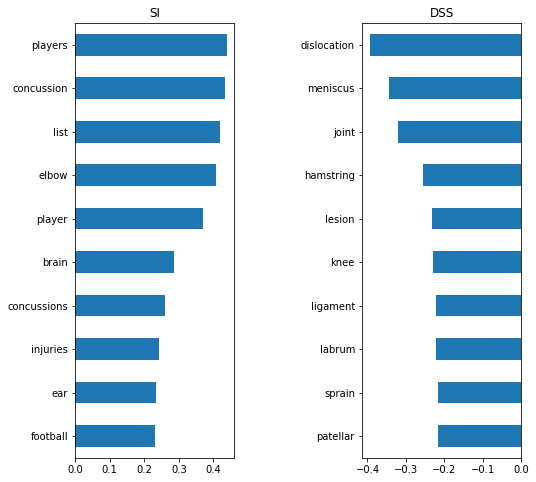

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(8, 8))
fig.subplots_adjust(wspace=0.8)
SI_top10.sort_values('coef').plot.barh(legend=False, ax=axs[0])
axs[0].set_yticklabels(pos_top10['vocab'].values.tolist()[::-1]) #counts backwards 
axs[0].set_title('SI');
DSS_top10.sort_values('coef', ascending=False).plot.barh(legend=False, ax=axs[1])
axs[1].set_yticklabels(neg_top10['vocab'].values.tolist()[::-1])
axs[1].set_title('DSS');
#Copied this shell of a graph
#keep this for further notice

# What I could have done better

1) More EDA, disocover meaningful graphs to gain better insights
3) Added validation set to test more model types
4) stemming or lemmetization
